<center><img src="Logolink_OP_VVV_hor_barva_cz.jpg" width="600px"/></center>

#### <center>ESF projekt Západočeské univerzity v Plzni reg. č. CZ.02.2.69/0.0/0.0/16 015/0002287</center>


# USVP  1

## Python 3.X instalation 

### Windows

PythonXY https://code.google.com/p/pythonxy/

WinPython http://winpython.github.io/

Anaconda https://store.continuum.io/cshop/anaconda/

### Linux

Two versions of Python (2.7 and 3.6) are usually installed in the Linux distribution .

## IDE

PyCharm https://www.jetbrains.com/pycharm/

Visual Studio Code https://code.visualstudio.com/

případně další https://wiki.python.org/moin/IntegratedDevelopmentEnvironments

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib
/home/neduchal/.local/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['matrix', 'array']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Python basics

In [1]:
print("Hello World")

Hello World


In [2]:
import numpy as np 
nums = [0, 1, 6, 3, 4, 5] # List
print("List nums:")
print(nums) # Print List
nums[2] # Access to the third item of the List
nums[1:3] # Access to the second and third item of the list
nums[::-1] # Reversed list
matrix = np.ones([10,10], dtype=np.uint8) # Numpy matrix 10x10 contains ones in all cells
matrix_zero = np.zeros([10,10], dtype=np.uint8) # Numpy matrix 10x10 contains zeros in all cells
matrix[1:3,3:6] = 2 # Set cells value in the part of the matrix to the value 2
print("Matrix part")
print(matrix[0:4,2:7]) # print whole matrix
array = matrix.ravel() # transorm matrix into 1D array

List nums:
[0, 1, 6, 3, 4, 5]
Matrix part
[[1 1 1 1 1]
 [1 2 2 2 1]
 [1 2 2 2 1]
 [1 1 1 1 1]]


## Image Processing

In [4]:
import skimage
import skimage.data
import matplotlib.pyplot as plt

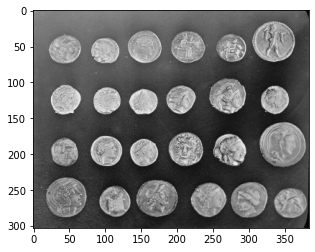

In [5]:
# Load image coins from skimage.data
img = skimage.data.coins()
# Matplotlib show image like matrix (numpy ndimage)
plt.imshow(img, cmap="gray") # colormap grayscale
plt.show() # nothing showed without this line

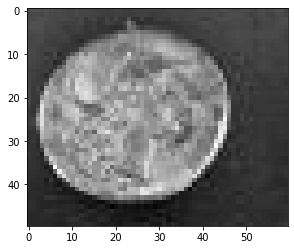

In [6]:
# Show part of the image
plt.imshow(img[30:80, 20:80], cmap="gray")
plt.show()

## Histograms

### Absolute histogram

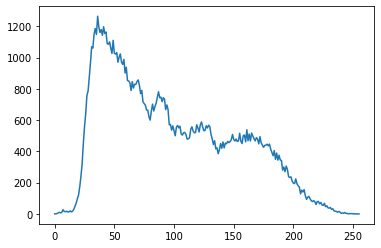

In [7]:
# Function computing histogram of the image (fixed for 256 bins)
def histogram(image):
    hist = np.zeros(256, dtype=int)
    for i in image.ravel():
        hist[i] += 1
    return hist

h = histogram(img)
# Show histogram
plt.plot(h)
plt.show()


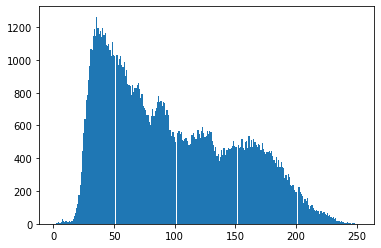

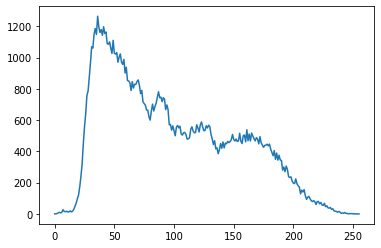

In [8]:
# compute histogram using matplotlib
h2 = plt.hist(img.ravel(), bins=256)
# compute histogram using numpy
h3, _ = np.histogram(img.ravel(), 256, (0, 255))
plt.figure() # Plot to a new figure
plt.plot(h3)
plt.show()

### Relative histogram

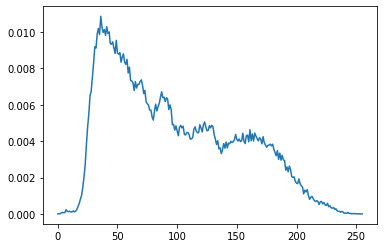

In [9]:
# Compute relative histogram
plt.plot(h/(img.shape[0]*img.shape[1]))
plt.show()

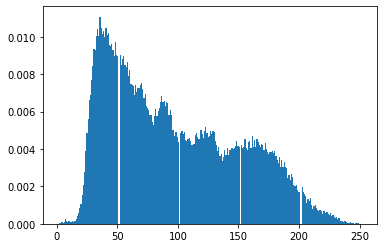

In [10]:
# Compute relative histogram using matplotlib
r2 = plt.hist(img.ravel(),density=True, bins=256)

### Cumulative histogram

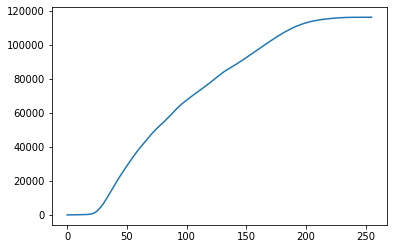

In [11]:
# Compute cumulative histogram
def cumulative(hist):
    chist = hist.copy()
    for i in range(1, len(chist)):
        chist[i] += chist[i-1] 
    return chist

c = cumulative(h)

plt.plot(c)
plt.show()

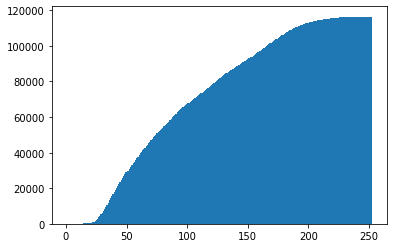

In [12]:
# compute cumulative histogram using matplotlib
h2 = plt.hist(img.ravel(),cumulative=True, bins=256)